In [8]:
import confluent_kafka
import time
import uuid
import pandas as pd
import seaborn as sns
from datetime import timezone, datetime
#%pylab inline

In [9]:
read_readings = {}
bootstrap_servers = 'localhost:9092'

In [10]:
total_docs=0
j=0
itr=0
MAX_ITR=10
startf = datetime.now();

while itr<MAX_ITR: 
    start = datetime.now();
    for index in range(100000000000):
        
        try:
            #confluent_kafka_consumer_performance()
            #print("%d documents found" % res['hits']['total'])
            topic = 'confluent-kafka-topic'
            conf = {'bootstrap.servers': bootstrap_servers,
                    'group.id': uuid.uuid1(),
                    'session.timeout.ms': 6000,
                    'default.topic.config': {
                    'auto.offset.reset': 'earliest'
                    }
                   }
            consumer = confluent_kafka.Consumer(**conf)
            consumer.subscribe([topic])    

            timec=int((datetime.now() - start).total_seconds())

            if timec==1:
                j=j+1
                itr=itr+1
                read_readings[j]=index
                total_docs=total_docs + index
                break
                   
        except:
            print ('Unexpected error:', sys.exc_info()[0], ', for index ', index)
            raise
consumer.close()            
print ('Read',total_docs, ' in ', (datetime.now() - startf).total_seconds(), 's')
print ('average read per second is :',total_docs/MAX_ITR)

Read 4961  in  10.029857 s
average read per second is : 496.1


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3aec9efe10>],
      dtype=object)

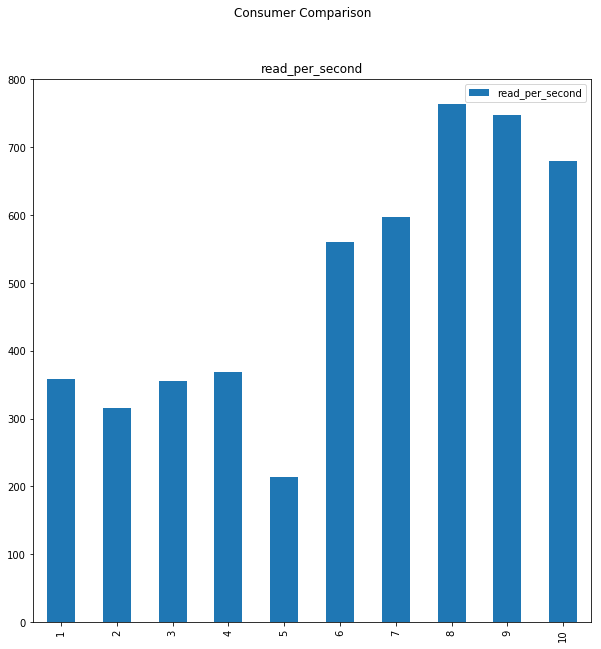

In [11]:
consumer_df = pd.DataFrame.from_dict(read_readings, orient='index').rename(columns={0: 'read_per_second'})

consumer_df.sort_index(inplace=True)
consumer_df
consumer_df.plot(kind='bar', subplots=True, figsize=(10, 10), title="Consumer Comparison")
